## Credit Card Default Dataset - data exploration
Steps:
1. Ratio of 'default' in the training set; ratio of the train-test-split.
2. Draw bar charts to investigate categorical variables (SEX, MARRIAGE, EDUCATION). See how the training dataset is divided and if there are sparse classes which can cause overfit of the model.
3. Draw histograms to investigate numerical variables (LIMIT_BAL, AGE, BILL_AMT, PAY_AMT). Check the distribution and the presence of outliers.
4. Check features correlations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load pre-processed training set
path = '.\\' # change to your local file location

df_train = pd.read_csv(path + 'CreditCard_train_processed.csv')
df_test = pd.read_csv(path + 'CreditCard_test_processed.csv')

### Calculate some ratios

0.22375


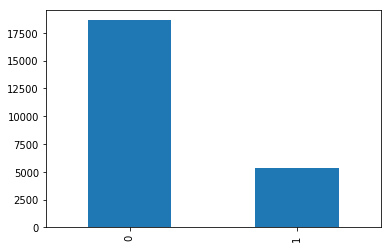

In [3]:
# default probability in the training set
print(df_train['default'].sum() / len(df_train['default']))
# alternative: draw bar chart
df_train['default'].value_counts().plot.bar()

22% **Default**, 78% **No default** in the training set.

In [5]:
# check the ratio of train-test split
print('train:', df_train.shape[0] / (df_train.shape[0] + df_test.shape[0]))
print('test:', df_test.shape[0] / (df_train.shape[0] + df_test.shape[0]))

train: 0.8
test: 0.2


Train-test-split is **8:2**.

### Check single variable's distribution

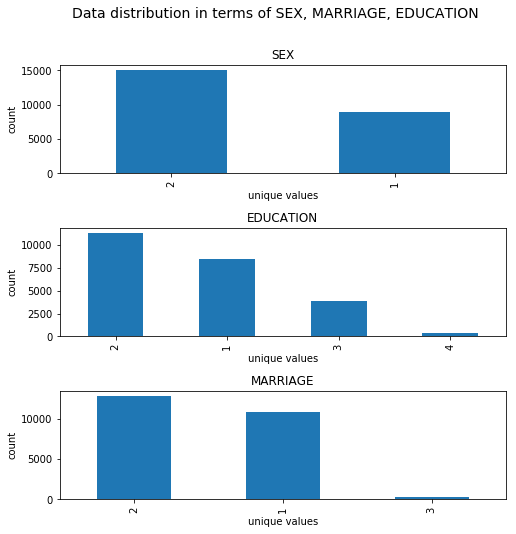

In [7]:
# draw bar charts
fig, axes = plt.subplots(nrows=3, figsize=(8,8))
fig.suptitle('Data distribution in terms of SEX, MARRIAGE, EDUCATION', fontsize=14)

df_train['SEX'].value_counts().plot.bar(ax=axes[0])
df_train['EDUCATION'].value_counts().plot.bar(ax=axes[1])
df_train['MARRIAGE'].value_counts().plot.bar(ax=axes[2])
axes[0].set_title('SEX')
axes[1].set_title('EDUCATION')
axes[2].set_title('MARRIAGE')

for ax in axes.flat:
    ax.set(xlabel='unique values', ylabel='count')

plt.subplots_adjust(hspace=0.5)
plt.show()

More females than males.
<br>
Education level is mostly graduate school and university.
<br>
Most of the clients are either marrined or single (less frequent the other status).

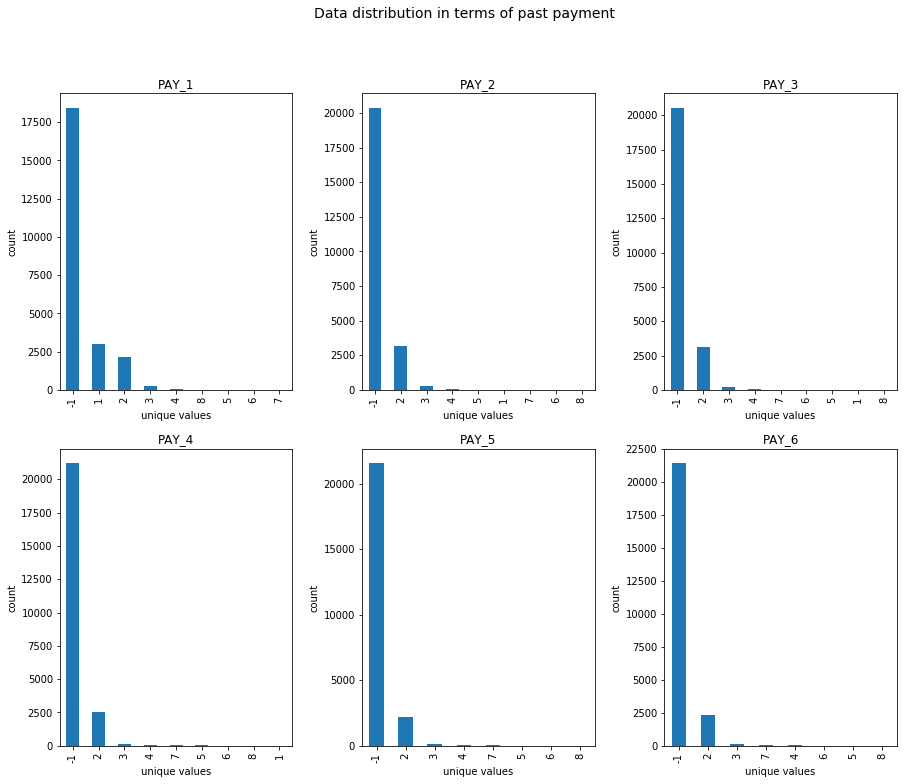

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,12))
fig.suptitle('Data distribution in terms of past payment', fontsize=14)

df_train['PAY_1'].value_counts().plot.bar(ax=axes[0,0])
df_train['PAY_2'].value_counts().plot.bar(ax=axes[0,1])
df_train['PAY_3'].value_counts().plot.bar(ax=axes[0,2])
df_train['PAY_4'].value_counts().plot.bar(ax=axes[1,0])
df_train['PAY_5'].value_counts().plot.bar(ax=axes[1,1])
df_train['PAY_6'].value_counts().plot.bar(ax=axes[1,2])

axes[0,0].set_title('PAY_1')
axes[0,1].set_title('PAY_2')
axes[0,2].set_title('PAY_3')
axes[1,0].set_title('PAY_4')
axes[1,1].set_title('PAY_5')
axes[1,2].set_title('PAY_6')

for ax in axes.flat:
    ax.set(xlabel='unique values', ylabel='count')

plt.subplots_adjust(hspace=0.2, wspace=0.3)
plt.show()

C:\Users\yange\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


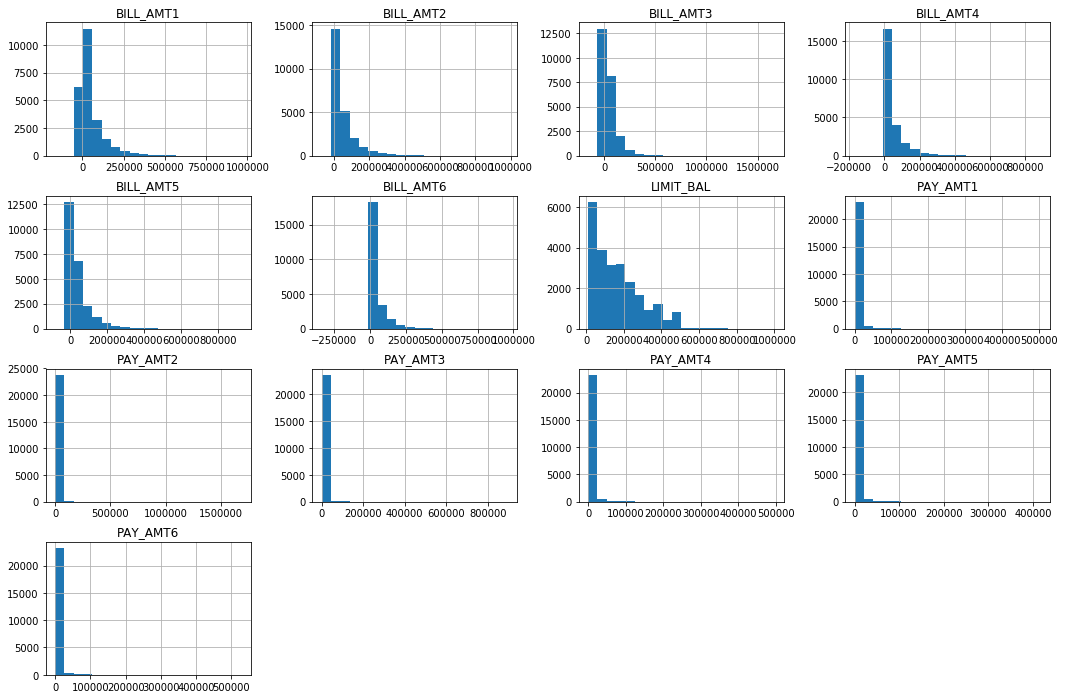

In [10]:
# draw histograms
fig= plt.figure(figsize = (18,12))
ax = fig.gca()

df_train[['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 
    'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].hist(ax=ax, bins=20)
plt.show()

[Text(0,0.5,'count'), Text(0.5,0,'ages')]

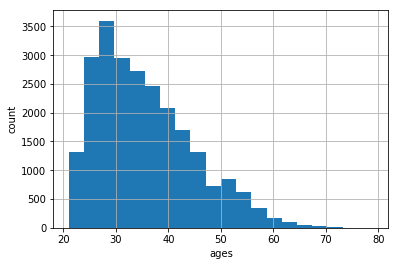

In [11]:
ax = df_train['AGE'].hist(bins=20)
ax.set(xlabel='ages', ylabel='count')

### Features correlation

[Text(0,0,'Male'), Text(0,0,'Female')]

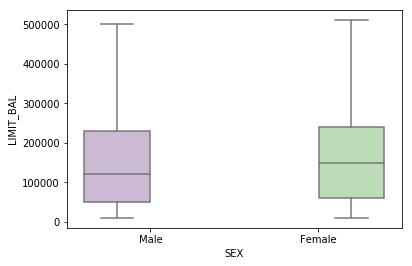

In [12]:
# check the credit limit distribution vs. sex
ax = sns.boxplot(x="SEX", y="LIMIT_BAL", hue="SEX",data=df_train, palette="PRGn",showfliers=False)
ax.legend_.remove()

# interpret the unique values in xticks
xlabels = [item.get_text() for item in ax.get_xticklabels()]
sex_encoder = {'1':'Male', '2':'Female'}
xlabels = [sex_encoder.get(xlabels[i]) for i in range(len(xlabels))]
ax.set_xticklabels(xlabels)

The limit credit amount is quite balanced between sexes. The males have a slightly smaller Q1 and mean.

In [13]:
# Features correlation for numerical variables
def check_correlation(variables, title:str):
    plt.figure(figsize = (10,8))
    plt.title(title + ' (Apr 2005 to Sep 2005)' + '\nCorrelation Plot')
    corr = df_train[variables].corr()
    sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,vmin=-1, vmax=1)
    plt.show()

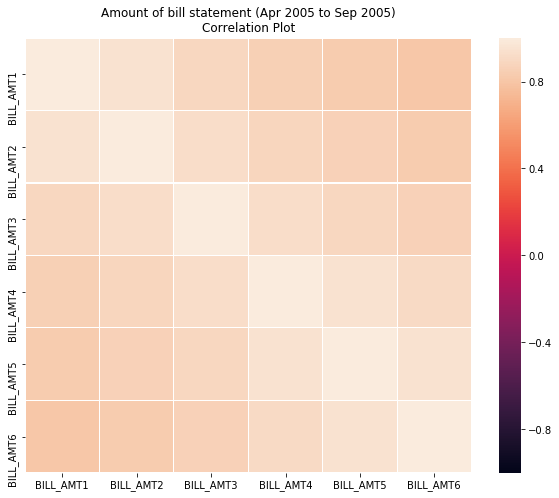

In [14]:
# check the correlation of Amount of bill statement
check_correlation(['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6'], 'Amount of bill statement')

Correlation is decreasing as the distance between months increases. Lowest correlation is between Sept (BILL_AMT1) & April (BILL_AMT6).

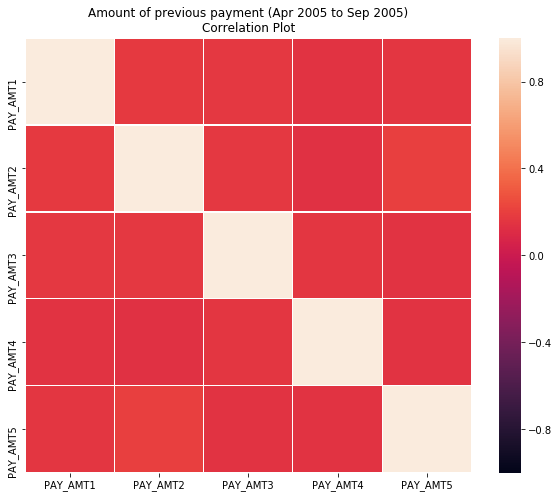

In [15]:
# check the correlation of Amount of previous payment
check_correlation(['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5'], 'Amount of previous payment')

There are no correlations between amounts of previous payments.

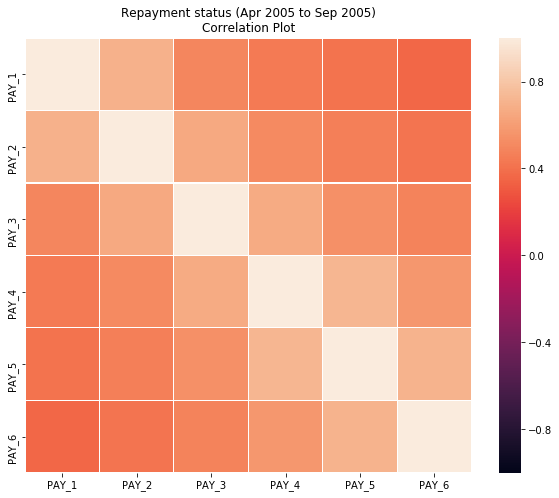

In [16]:
# check the correlation between Repayment status
check_correlation(['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], 'Repayment status')

Correlation is decreasing as the distance between months increases. Lowest correlation is between Sept (BILL_AMT1) & April (BILL_AMT6).

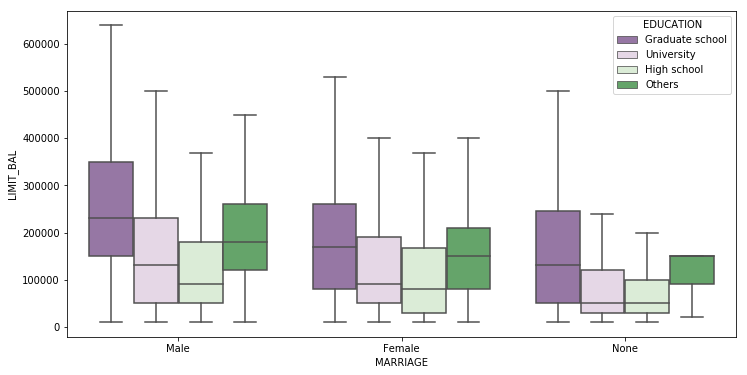

In [17]:
# credit amount limit distribution grouped by marriage status and education level
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(ax=ax, x='MARRIAGE', y='LIMIT_BAL', hue='EDUCATION', data=df_train, palette="PRGn",showfliers=False)

# interpret the unique values (of EDUCATION) in legend
education_encoder = {'1':'Graduate school', '2':'University', '3':'High school', '4': 'Others'}
L = plt.legend()
L.set_title('EDUCATION')
for i in range(len(L.get_texts())):
    legend_text = L.get_texts()[i].get_text()
    L.get_texts()[i].set_text(education_encoder.get(legend_text))

# interpret the unique values (of MARRIAGE) in xticks
xlabels = [item.get_text() for item in ax.get_xticklabels()]
marriage_encoder = {'1':'Married', '2':'Single', '3':'Others'}
xlabels = [sex_encoder.get(xlabels[i]) for i in range(len(xlabels))]
ax.set_xticklabels(xlabels)

plt.show()

In general, higher education level has higher credit among all marriage groups. **Married** people have higher credit than **Single** than **Others** among all education levels.